# Đối sánh mẫu sử dụng tương quan
Ta sẽ đi tìm kiếm những vùng tương đương với mẫu được cho trong một bức ảnh sử dụng Tương quan (Correlation). Một phương pháp đối sánh mẫu dựa trên mẫu. Hiểu đơn giản đó là trượt mẫu trên bức ảnh và so sánh.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

img_rgb = cv2.imread('src_img.jpg') # đọc ảnh nguồn
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) # chuyển sang ảnh xám

template = cv2.imread('tem_img.jpg',0) # đọc ảnh mẫu
w, h = template.shape[::-1]  # gán giá trị w = rộng, h = độ cao (nhớ là của ảnh mẫu)

In [4]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)  # dùng để tìm vùng tương đồng,
threshold = 0.8 # khai báo ngưỡng
loc = np.where( res >= threshold) # những chỗ >= ngưỡng

In [12]:
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2) # vẽ cái hình chữ nhật

#cv2.imshow('Detected',img_rgb) # show ảnh
#cv2.waitKey(0)
#cv2.destroyAllWindows()

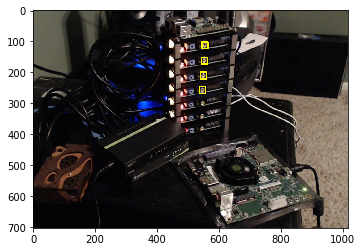

In [13]:
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

Thuật toán hoạt động khá tốt bởi vì mẫu và các vùng giống với mẫu trong ảnh có sự chênh lệch nhỏ về kích thước. Tuy nhiên nếu kích thước mà chênh lệch quá nhiều ta sẽ phải resize lại mẫu và so sánh ảnh nguồn. Sau khi lặp qua tât cả cá size, chọn ra vùng có độ tương quan lớn nhât và vùng đó được coi là trùng với mẫu.